In [39]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(16, 6))
plt.rc("font", size=13)
sns.set()
from sklearn.model_selection import train_test_split

### Loading Data

In [40]:
data1 = pd.read_excel(r"C:\Users\user\Desktop\Rawdata Overall and Product.xlsx", sheet_name = 'Product_Data')

In [41]:
data1.head()

,Date,No of Cases
0,2017-01-01,15
1,2017-01-02,18
2,2017-01-03,45
3,2017-01-04,56
4,2017-01-05,421


In [42]:
# Checking the shape of the data
data1.shape

(2038, 2)

In [43]:
# Basic statistics of the data
data1.describe()

,No of Cases
count,2038.000000
mean,79.577036
std,49.468145
min,-231.000000
25%,15.000000
50%,100.000000
75%,116.000000
max,421.000000


### Checking for missing values

In [44]:
data1.isnull().sum()

Date           0
No of Cases    0
dtype: int64

In [45]:
# Changing the date variable to datetime format
data1['Date'] =  pd.to_datetime(data1['Date'], format='%Y-%m-%d')

In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2038 entries, 0 to 2037
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2038 non-null   datetime64[ns]
 1   No of Cases  2038 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 32.0 KB


In [28]:
data1.head()

,Date,No of Cases
0,2017-01-01,300
1,2017-01-02,18
2,2017-01-03,45
3,2017-01-04,56
4,2017-01-05,421


In [46]:
#converting a single column DataFrame into a Series
data1.squeeze()

,Date,No of Cases
0,2017-01-01,15
1,2017-01-02,18
2,2017-01-03,45
3,2017-01-04,56
4,2017-01-05,421
...,...,...
2033,2022-07-27,-231
2034,2022-07-28,99
2035,2022-07-29,99
2036,2022-07-30,5


In [47]:
data1.set_index('Date', inplace=True)

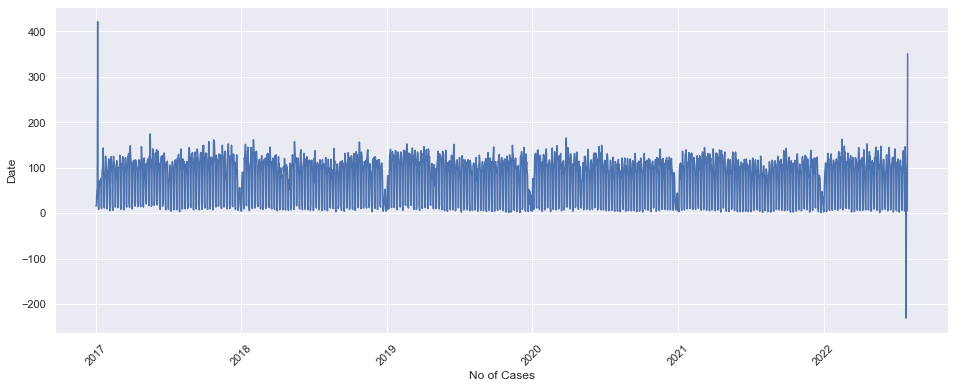

In [48]:
# Creating Line chart to see high level view of the data
plt.ylabel('Date')
plt.xlabel('No of Cases')
plt.xticks(rotation=45)
plt.plot(data1.index, data1['No of Cases'], )

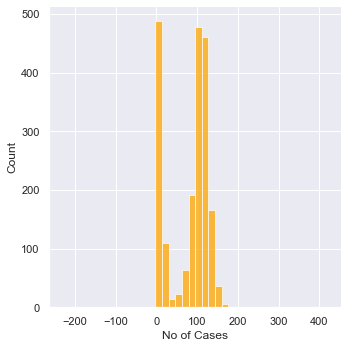

In [49]:
# Checking the distribution of the data
sns.displot(data1['No of Cases'],bins=40,color="orange")

In [50]:
#The data is left skewed

{'whiskers': [<matplotlib.lines.Line2D at 0x2865c82ddf0>,
 'caps': [<matplotlib.lines.Line2D at 0x2865c83f3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2865c82dc40>],
 'medians': [<matplotlib.lines.Line2D at 0x2865c83f970>],
 'fliers': [<matplotlib.lines.Line2D at 0x2865c83fc40>],
 'means': []}

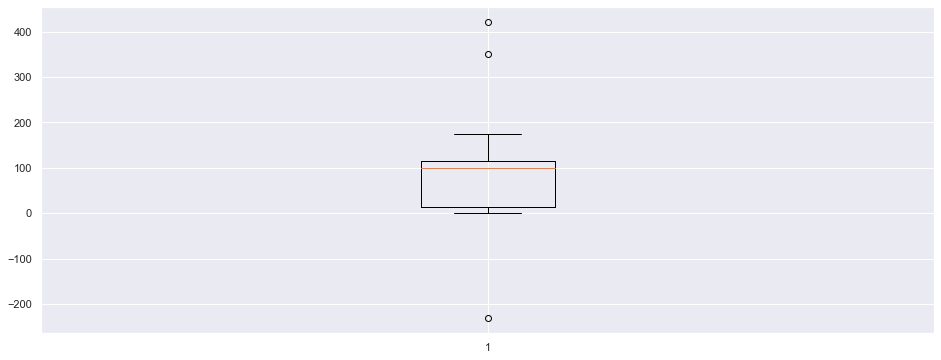

In [51]:
# Identifying outliers through Box plot
plt.boxplot(data1)

### Handling and identifying outliers using IQR method

In [52]:
q3, q1 = np.percentile(data1, [75, 25])
print(q3, q1)
IQR = q3 - q1
print(IQR)

upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)

data1 = data1[data1 < upper_bound]
data1 = data1[data1 > lower_bound]
data1

116.0 15.0
101.0
267.5
-136.5


,No of Cases
Date,
2017-01-01,15.0
2017-01-02,18.0
2017-01-03,45.0
2017-01-04,56.0
2017-01-05,NaN
...,...
2022-07-27,NaN
2022-07-28,99.0
2022-07-29,99.0


In [53]:
data1.isnull().sum()

No of Cases    3
dtype: int64

### Imputation of missing values by Interpolation technique

In [54]:
data1['Interpolate_Spline']= data1['No of Cases'].interpolate(option='spline')

In [55]:
data1

,No of Cases,Interpolate_Spline
Date,,
2017-01-01,15.0,15.0
2017-01-02,18.0,18.0
2017-01-03,45.0,45.0
2017-01-04,56.0,56.0
2017-01-05,NaN,51.5
...,...,...
2022-07-27,NaN,101.0
2022-07-28,99.0,99.0
2022-07-29,99.0,99.0


In [56]:
data1 = data1.rename(columns={'Interpolate_Spline': 'No of Cases_'})

In [57]:
data1

,No of Cases,No of Cases_
Date,,
2017-01-01,15.0,15.0
2017-01-02,18.0,18.0
2017-01-03,45.0,45.0
2017-01-04,56.0,56.0
2017-01-05,NaN,51.5
...,...,...
2022-07-27,NaN,101.0
2022-07-28,99.0,99.0
2022-07-29,99.0,99.0


In [58]:
data1.drop(['No of Cases'], axis=1, inplace=True)

In [59]:
data1.isnull().sum()

No of Cases_    0
dtype: int64

In [60]:
data1

,No of Cases_
Date,
2017-01-01,15.0
2017-01-02,18.0
2017-01-03,45.0
2017-01-04,56.0
2017-01-05,51.5
...,...
2022-07-27,101.0
2022-07-28,99.0
2022-07-29,99.0


### Stationarity identification

In [15]:
result = adfuller(data1, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -7.634240555879367
n_lags: 1.9717125070853214e-11
p-value: 1.9717125070853214e-11
Critial Values:
   1%, -3.43359945413637
Critial Values:
   5%, -2.8629754397529616
Critial Values:
   10%, -2.5675341657789903


In [16]:
# As the p-value is greater than 0.05 , so we fail to reject the null hypothesis which means the data is non Stationary

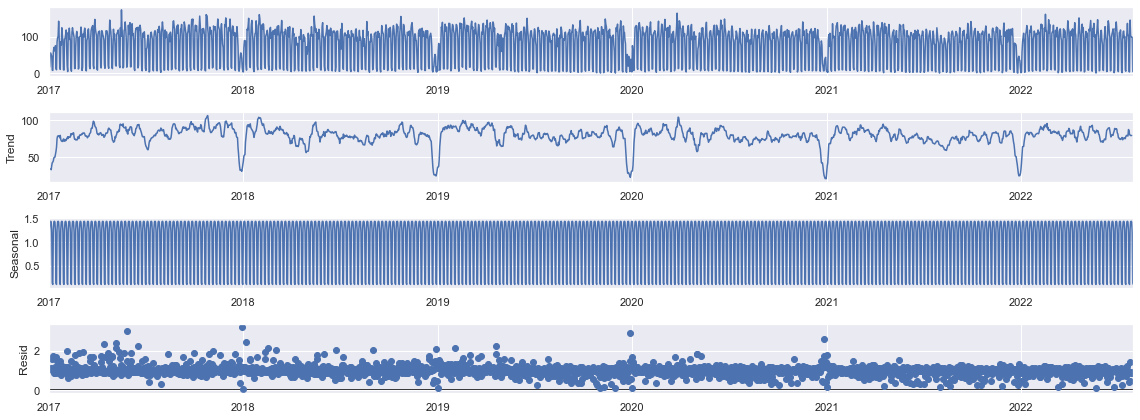

In [61]:
#decomposing data to separate and visualize trend and seasonality
decompose_result = seasonal_decompose(data1,model='multiplicative')
decompose_result.plot();

In [18]:
# As per the graph, the data has trend and seasonality in it

In [19]:
# Splitting data in train and test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(data1, test_size = 0.20, random_state = 5)
print(train.shape)
print(test.shape)

(1630, 1)
(408, 1)


#### We will try Arima and Auto Arima approach to see which one gives better accuracy

### ARIMA

In [20]:
# importing ARIMA module
from statsmodels.tsa.arima.model import ARIMA

In [21]:
data1.squeeze()

Date
2017-01-01      2
2017-01-02     18
2017-01-03     45
2017-01-04     56
2017-01-05     68
             ... 
2022-07-27    116
2022-07-28     99
2022-07-29     99
2022-07-30      5
2022-07-31      2
Name: No of Cases, Length: 2038, dtype: int64

In [22]:
test.index

DatetimeIndex(['2020-08-17', '2021-11-16', '2019-05-21', '2017-05-22',
               '2020-07-09', '2021-04-04', '2022-03-05', '2019-04-30',
               '2022-07-31', '2019-08-08',
               ...
               '2019-09-05', '2018-05-20', '2021-08-28', '2018-12-10',
               '2021-03-04', '2022-05-16', '2020-04-17', '2020-11-29',
               '2021-02-03', '2020-05-02'],
              dtype='datetime64[ns]', name='Date', length=408, freq=None)

In [23]:
# Creating model on training set with manual p,d,q values
y = train['No of Cases']
ARIMAmodel = ARIMA(y, order = (2,1, 2))
ARIMAmodel = ARIMAmodel.fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packa

In [24]:
# doing prediction with that model
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
#plt.plot(test.index,test['No of Cases'], color='blue', label = 'test')
#plt.plot(y_pred_out, color='green', label = 'ARIMA Predictions')
#plt.legend()
#plt.show()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [25]:
ARIMAmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            No of Cases   No. Observations:                 1630
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -8614.726
Date:                Fri, 04 Nov 2022   AIC                          17239.452
Time:                        17:16:50   BIC                          17266.430
Sample:                             0   HQIC                         17249.461
                               - 1630                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8409      0.203     -4.146      0.000      -1.238      -0.443
ar.L2         -0.0210      0.027     -0.777      0.437      -0.074       0.032
ma.L1         -0.1595      0.210     -0.760      0.447      -0.571       0.252
ma.L2         -0.8404      0.207     -4.061      0.000      -1.246      -0.435
sigma2      2285.6000    157.952     14.470      0.000    1976.020    2595.180
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               196.24
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -0.58
Prob(H) (two-sided):                  0.35   Kurtosis:                         1.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

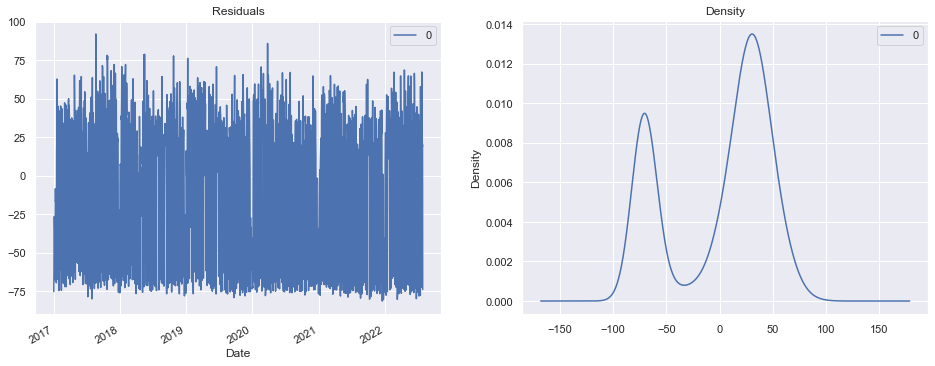

In [26]:
# Plotting Residual Errors  
residuals = pd.DataFrame(ARIMAmodel.resid)  
fig, ax = plt.subplots(1,2)  
residuals.plot(title = "Residuals", ax = ax[0])  
residuals.plot(kind = 'kde', title = 'Density', ax = ax[1])  
plt.show()  

In [27]:
# checking accuracy
from sklearn import metrics
print(metrics.mean_absolute_error(test, y_pred_out))  
print(metrics.mean_squared_error(test, y_pred_out))     
print(np.sqrt(metrics.mean_squared_error(test, y_pred_out)))  

43.63290901786572
2401.874203800858
49.008919635111916


In [28]:
# Running model on all data
ARIMAmodel = ARIMA(data1.squeeze(), order = (2, 1, 2))
ARIMAmodel = ARIMAmodel.fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

In [29]:
ARIMAmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            No of Cases   No. Observations:                 2038
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -10029.083
Date:                Fri, 04 Nov 2022   AIC                          20068.166
Time:                        17:17:07   BIC                          20096.262
Sample:                    01-01-2017   HQIC                         20078.473
                         - 07-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1015      0.015     75.051      0.000       1.073       1.130
ar.L2         -0.8242      0.016    -52.863      0.000      -0.855      -0.794
ma.L1         -1.6380      0.016   -103.058      0.000      -1.669      -1.607
ma.L2          0.8281      0.016     53.041      0.000       0.797       0.859
sigma2      1104.3467     45.776     24.125      0.000    1014.627    1194.066
===================================================================================
Ljung-Box (L1) (Q):                  11.75   Jarque-Bera (JB):                49.48
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.04
Prob(H) (two-sided):                  0.84   Kurtosis:                         2.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
y_pred = ARIMAmodel.forecast(30)

In [31]:
a = y_pred.to_frame()

In [39]:
a.to_csv("Product_forecast with arima.csv",index= False )

### Running rolling K-fold Cross validation 

In [30]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
tscv = TimeSeriesSplit(n_splits = 4)
rmse = []
for train_index, test_index in tscv.split(cross_validation):
    cv_train, cv_test = cross_validation.iloc[train_index], cross_validation.iloc[test_index]
    
    arma = sm.tsa.ARMA(cv_train, (2,2)).fit(disp=False)
    
    predictions = arma.predict(cv_test.index.values[0], cv_test.index.values[-1])
    true_values = cv_test.values
    rmse.append(sqrt(mean_squared_error(true_values, predictions)))
    
print("RMSE: {}".format(np.mean(rmse)))

NameError: name 'cross_validation' is not defined

### AUTO ARIMA

In [34]:
# AUTO ARIMA
# model created on training set
import pmdarima as pmd
auto_arima_model = pmd.auto_arima(train,start_p=0, d=1, start_q=0, max_p=3, max_d=3, max_q=3, start_P=0, D=1, start_Q=1, max_P=3, max_D=3, max_Q= 3, 
                   m=12, seasonal=True, error_action='warn', trace = True, supress_warnings= True, stepwise = True, 
                   random_state=5, n_fits = 5 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.98 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=19329.861, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=18355.391, Time=0.82 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.80 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=18839.545, Time=0.19 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=18161.660, Time=2.22 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=18091.938, Time=4.21 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=14.76 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=8.75 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=18581.565, Time=4.58 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=17864.833, Time=7.93 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=17935.219, Time=4.82 sec
 ARIMA(2,1,0)(3,1,1)[12]             : AIC=inf, Time=18.31 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=11.15 sec
 ARIMA(3,1,0)(3,1,0)[12]             :

In [35]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1630
Model:             SARIMAX(3, 1, 0)x(3, 1, 0, 12)   Log Likelihood               -8899.068
Date:                            Fri, 04 Nov 2022   AIC                          17812.136
Time:                                    17:21:22   BIC                          17849.854
Sample:                                         0   HQIC                         17826.134
                                           - 1630                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7664      0.026    -29.662      0.000      -0.817      -0.716
ar.L2         -0.4928      0.029    -16.783      0.000      -0.550      -0.435
ar.L3         -0.1826      0.026     -7.112      0.000      -0.233      -0.132
ar.S.L12      -0.7697      0.025    -30.436      0.000      -0.819      -0.720
ar.S.L24      -0.5135      0.029    -17.577      0.000      -0.571      -0.456
ar.S.L36      -0.2122      0.024     -8.668      0.000      -0.260      -0.164
sigma2      3509.6245    141.847     24.742      0.000    3231.609    3787.640
===================================================================================
Ljung-Box (L1) (Q):                   1.99   Jarque-Bera (JB):                37.02
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -0.28
Prob(H) (two-sided):                  0.30   Kurtosis:                         2.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
# Running model on test set
auto_arima_model.predict(n_periods = len(test.index))

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1630    119.541929
1631     84.921421
1632    124.305343
1633     57.985494
1634    130.502186
           ...    
2033    437.600419
2034    395.997071
2035    412.309993
2036    421.103373
2037    380.160572
Length: 408, dtype: float64

In [37]:
auto_predict = auto_arima_model.predict(n_periods = len(test.index))

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [38]:
# checking accuracy
from sklearn import metrics
print(metrics.mean_absolute_error(test, auto_predict))  
print(metrics.mean_squared_error(test, auto_predict))     
print(np.sqrt(metrics.mean_squared_error(test, auto_predict))) 

181.23639764858598
44084.187565451444
209.9623479708956


### We have chosen Arima model (out of Arima and Auto Arima) because we were getting less MAE, MSE and RMSE values for it